# Advance Regression System House Prediction

### GOAL: Predict the sale price of each house with performance evaluated using RMSE on the logarithm of predicted vs. actual prices.

#### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"Trainign set shape: {train.shape}")
print(f"Trainign set shape: {test.shape}")


Trainign set shape: (1460, 81)
Trainign set shape: (1459, 80)


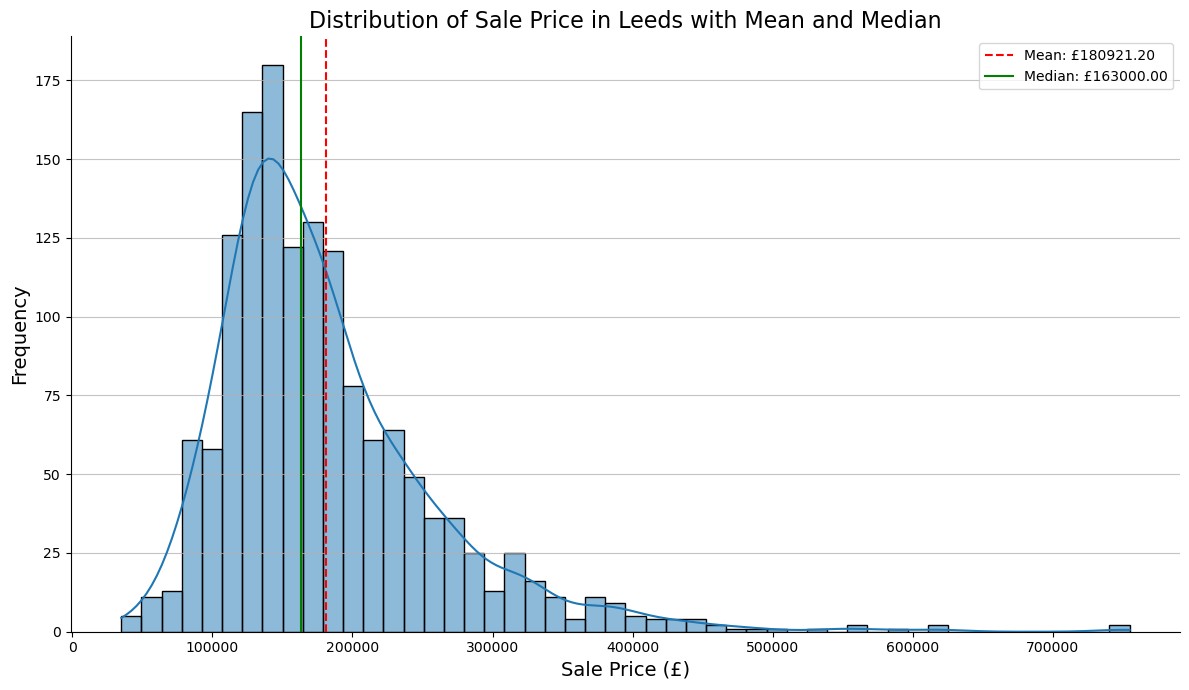

In [47]:
# 2. Adding Descriptive Statistics
plt.figure(figsize=(12, 7))
sns.histplot(train["SalePrice"], bins=50, kde=True)
mean_price = train["SalePrice"].mean()
median_price = train["SalePrice"].median()
plt.axvline(mean_price, color='r', linestyle='--', linewidth=1.5, label=f'Mean: £{mean_price:.2f}')
plt.axvline(median_price, color='g', linestyle='-', linewidth=1.5, label=f'Median: £{median_price:.2f}')
plt.xlabel("Sale Price (£)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Sale Price in Leeds with Mean and Median", fontsize=16)
plt.legend()
plt.grid(axis='y', alpha=0.75)
sns.despine()
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

In [4]:
# Check for skewness
print(f"Skewness of SalePrice: {train["SalePrice"].skew()}")

Skewness of SalePrice: 1.8828757597682129


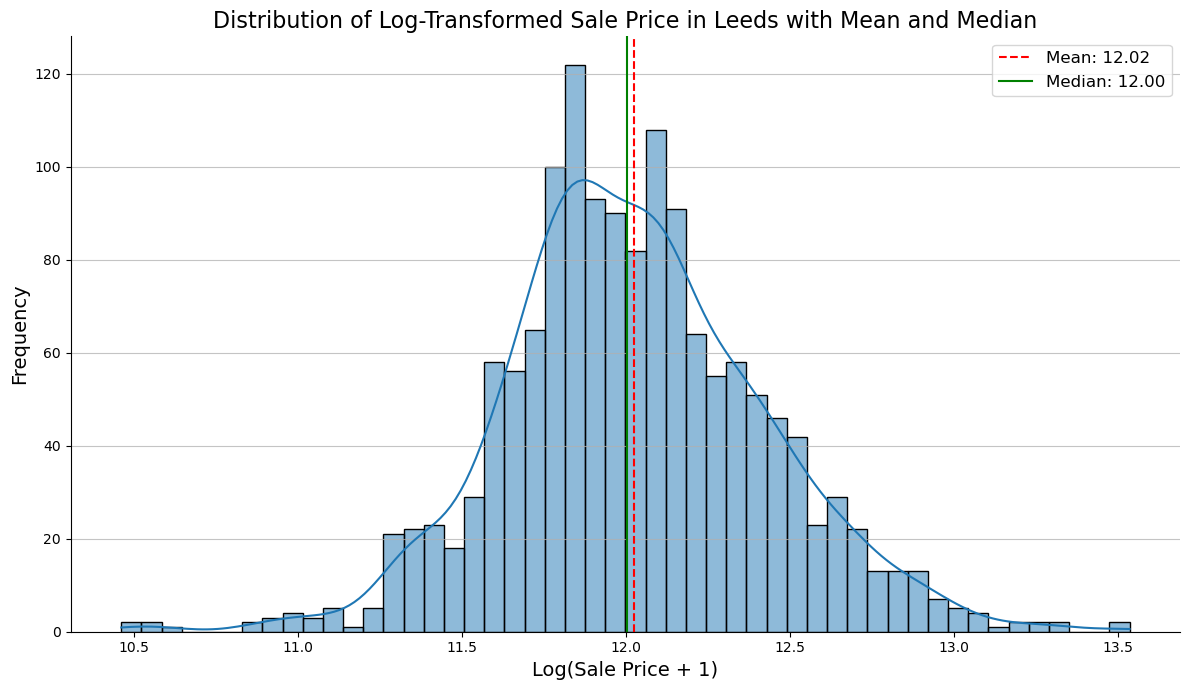

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(np.log1p(train["SalePrice"]), bins=50, kde=True)

log_mean_price = np.log1p(train["SalePrice"]).mean()
log_median_price = np.log1p(train["SalePrice"]).median()

plt.axvline(log_mean_price, color='r', linestyle='--', linewidth=1.5, label=f'Mean: {log_mean_price:.2f}')
plt.axvline(log_median_price, color='g', linestyle='-', linewidth=1.5, label=f'Median: {log_median_price:.2f}')

plt.xlabel("Log(Sale Price + 1)", fontsize=14) 
plt.ylabel("Frequency", fontsize=14) 
plt.title("Distribution of Log-Transformed Sale Price in Leeds with Mean and Median", fontsize=16) 
plt.legend(fontsize=12) 
plt.grid(axis='y', alpha=0.75)
sns.despine()
plt.tight_layout()
plt.show()


In [6]:
# Check for skewness
print(f"Skewness of Log(SalePrice): {np.log1p(train["SalePrice"]).skew()}")

Skewness of Log(SalePrice): 0.12134661989685333


In [7]:
# Correlatioon with SalePrice
numeric_features = train.select_dtypes(include=["int64", "float64"]).columns.drop("Id")
correlation = train[numeric_features].corr()["SalePrice"].sort_values(ascending=False)
print("\nTop 10 features correlated with SalePrice: ")
print(correlation.head())


Top 10 features correlated with SalePrice: 
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


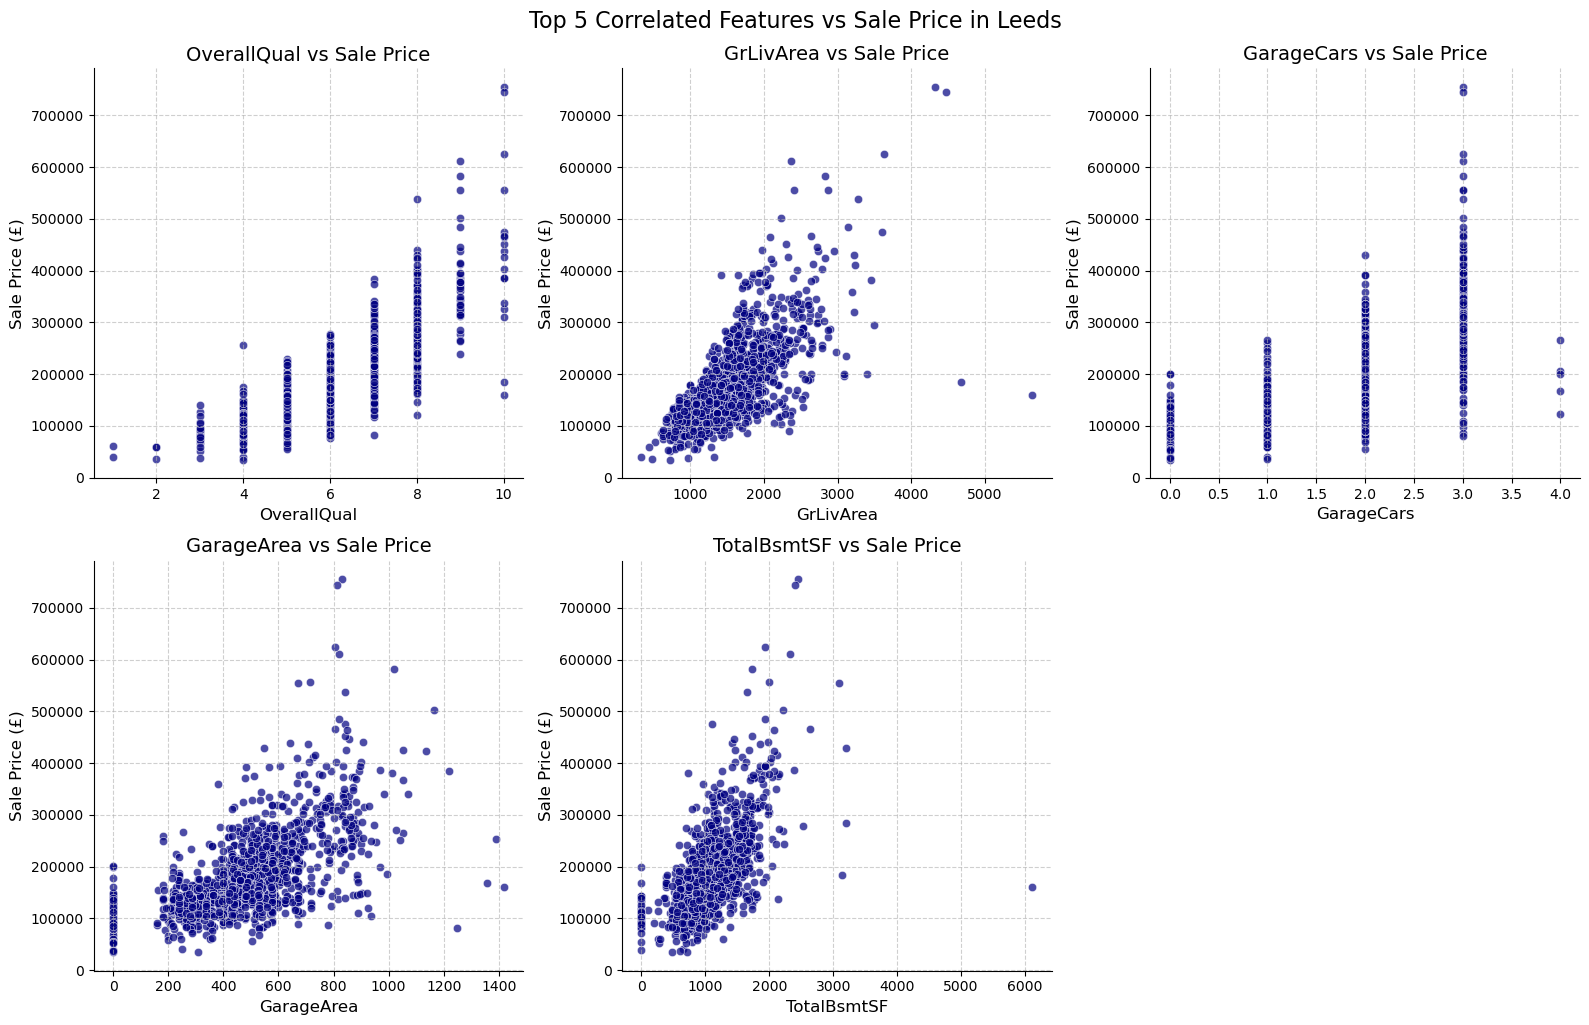

In [ ]:
top_features = correlation.index[1:6]
plt.figure(figsize=(16, 10)) 

for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=train[feature], y=train["SalePrice"], alpha=0.7, color='navy') 
    plt.title(f"{feature} vs Sale Price", fontsize=14) 
    plt.xlabel(feature, fontsize=12) 
    plt.ylabel("Sale Price (£)", fontsize=12) 
    sns.despine() 
    plt.grid(True, linestyle='--', alpha=0.6) 

plt.tight_layout()
plt.suptitle("Top 5 Correlated Features vs Sale Price in Leeds", fontsize=16, y=1.02) 
plt.show()


In [9]:
# Missing values
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_test = test.isnull().sum().sort_values(ascending=False)
missing_test = missing_test[missing_test > 0]

print("\nMissing values in train set: ")
print(missing_train.head(10))
print("\nMissing values in test set: ")
print(missing_test.head(10))


Missing values in train set: 
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64

Missing values in test set: 
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
dtype: int64


In [10]:
# Categorical features exploration
categorical_features = train.select_dtypes(include=["object"]).columns
print("\nCategorical features:")
print(categorical_features.tolist())


Categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [11]:
# Check cardinality of categorical features
print("\nCardinality of categorical features:")
for feature in categorical_features:
    print(f"{feature}: {train[feature].nunique()} unqiue values")


Cardinality of categorical features:
MSZoning: 5 unqiue values
Street: 2 unqiue values
Alley: 2 unqiue values
LotShape: 4 unqiue values
LandContour: 4 unqiue values
Utilities: 2 unqiue values
LotConfig: 5 unqiue values
LandSlope: 3 unqiue values
Neighborhood: 25 unqiue values
Condition1: 9 unqiue values
Condition2: 8 unqiue values
BldgType: 5 unqiue values
HouseStyle: 8 unqiue values
RoofStyle: 6 unqiue values
RoofMatl: 8 unqiue values
Exterior1st: 15 unqiue values
Exterior2nd: 16 unqiue values
MasVnrType: 3 unqiue values
ExterQual: 4 unqiue values
ExterCond: 5 unqiue values
Foundation: 6 unqiue values
BsmtQual: 4 unqiue values
BsmtCond: 4 unqiue values
BsmtExposure: 4 unqiue values
BsmtFinType1: 6 unqiue values
BsmtFinType2: 6 unqiue values
Heating: 6 unqiue values
HeatingQC: 5 unqiue values
CentralAir: 2 unqiue values
Electrical: 5 unqiue values
KitchenQual: 4 unqiue values
Functional: 7 unqiue values
FireplaceQu: 5 unqiue values
GarageType: 6 unqiue values
GarageFinish: 3 unqiue va

C:\Users\bharg\AppData\Local\Temp\ipykernel_41088\2918604304.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis") # Using a visually appealing palette
C:\Users\bharg\AppData\Local\Temp\ipykernel_41088\2918604304.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis") # Using a visually appealing palette
C:\Users\bharg\AppData\Local\Temp\ipykernel_41088\2918604304.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="

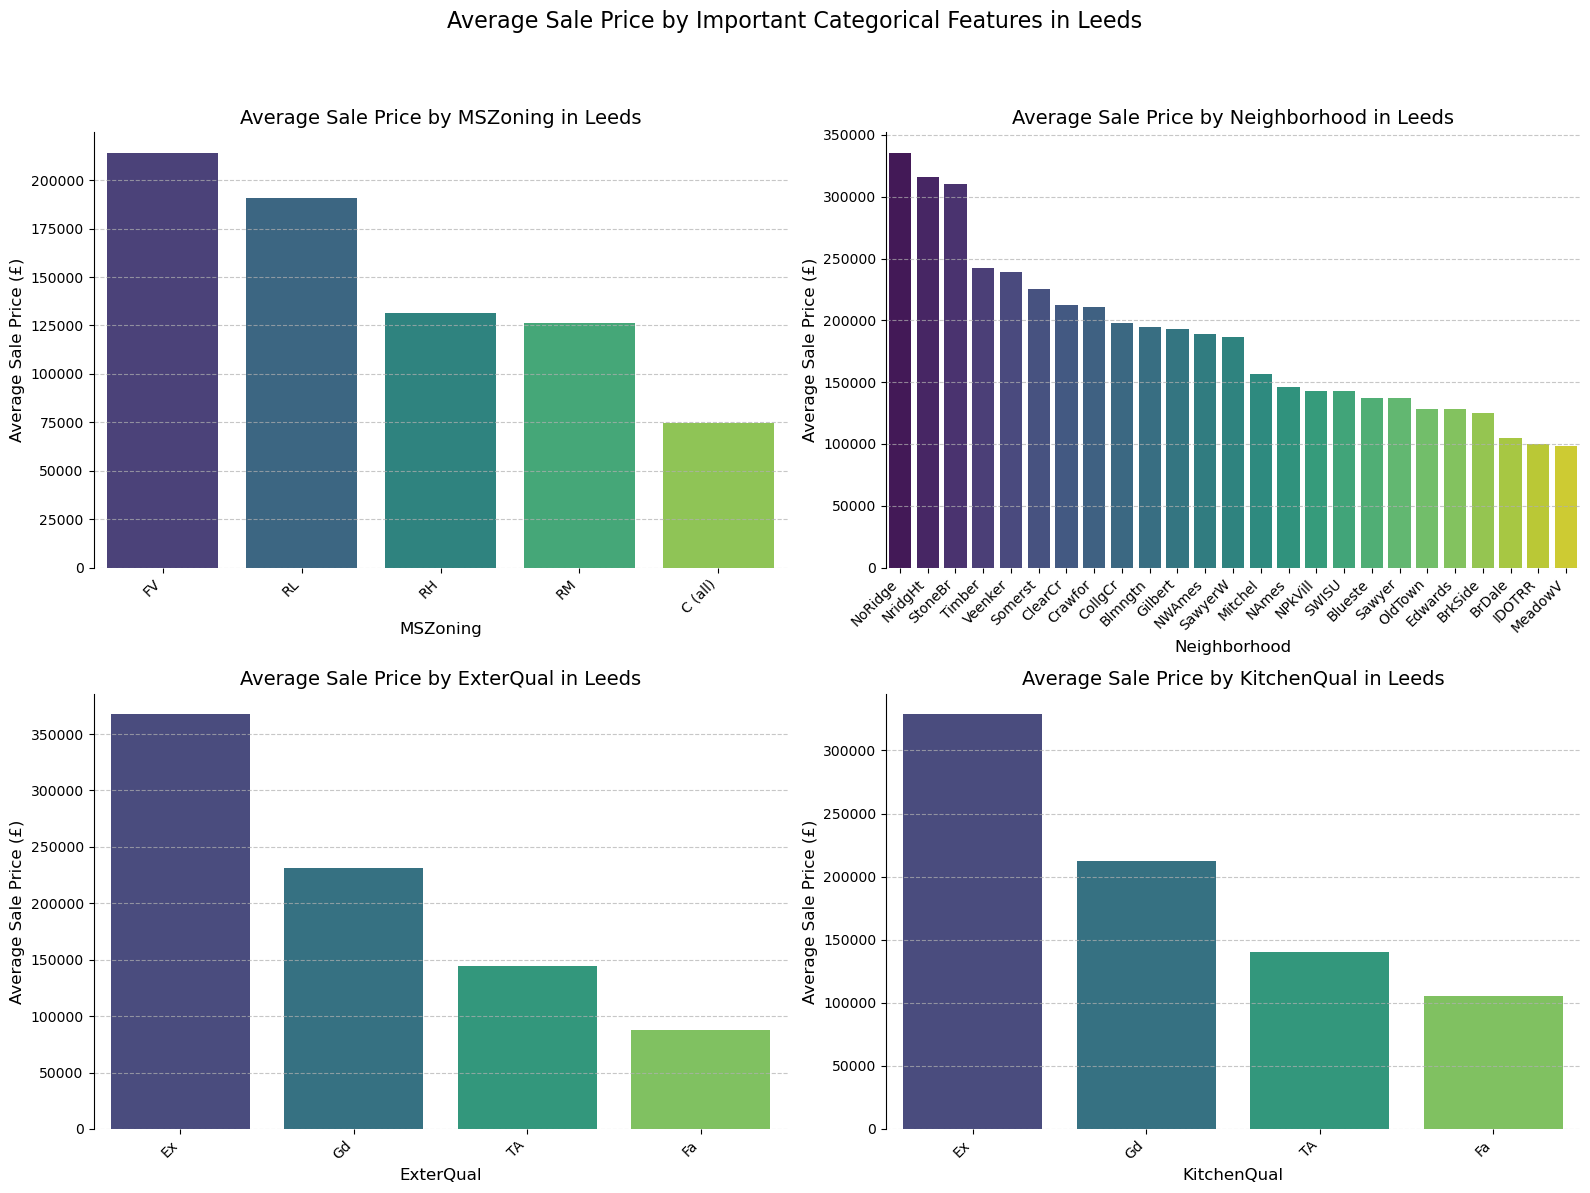

In [ ]:
important_cat_features = ["MSZoning", "Neighborhood", "ExterQual", "KitchenQual"]
plt.figure(figsize=(16, 12)) 

for i, feature in enumerate(important_cat_features):
    plt.subplot(2, 2, i + 1)
    data = train.groupby(feature)["SalePrice"].mean().sort_values(ascending=False)
    sns.barplot(x=data.index, y=data.values, palette="viridis") 
    plt.title(f"Average Sale Price by {feature} in Leeds", fontsize=14) 
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Average Sale Price (£)", fontsize=12) 
    plt.xticks(rotation=45, ha='right') 
    sns.despine(bottom=True) 
    plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle("Average Sale Price by Important Categorical Features in Leeds", fontsize=16, y=1.02)
plt.show()


In [13]:
# Func to combine datasets for preprocessing
def combine_datasets(train, test):
    train_id = train["Id"]
    test_id = test["Id"]

    # Remove the id column
    train.drop("Id", axis=1, inplace=True)
    test.drop("Id", axis=1, inplace=True)

    # Combine datasets
    target = train["SalePrice"]
    train.drop("SalePrice", axis=1, inplace=True)
    all_data = pd.concat([train, test], axis=0)

    return all_data, target, train_id, test_id

all_data, target, train_ID, test_ID = combine_datasets(train.copy(), test.copy())

# Check the shape
print(f"\nCombine data shape: {all_data.shape}")


Combine data shape: (2919, 79)


# Feature Engineering and Data Preprocessing

## Handling missing values for specific columns

In [14]:
def process_data(all_data):
    # Fill missing LotFrontage based on neighborhood
    all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median()))
    

    # For columns indicating the absence of a feature
    for col in ['Alley', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
               'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtQual', 'BsmtCond', 
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
        all_data[col] = all_data[col].fillna('None')
    
    # For numeric columns related to area or count 
    for col in ['GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
               'TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath']:
        all_data[col] = all_data[col].fillna(0)
    
    # For remaining categorical columns, fill with most frequent value
    for col in all_data.select_dtypes(include=['object']).columns:
        if all_data[col].isnull().any():
            all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    
    # For remaining numeric columns, fill with median
    for col in all_data.select_dtypes(include=['int64', 'float64']).columns:
        if all_data[col].isnull().any():
            all_data[col] = all_data[col].fillna(all_data[col].median())
    
    # Create new features
    # Since we saw high correlation with GrLivArea, we will create more area-related features
    all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
    
    # OverallQual is highly correlated, Create interaction terms with it
    all_data['OverallQual_TotalSF'] = all_data['OverallQual'] * all_data['TotalSF']
    all_data['OverallQual_GrLivArea'] = all_data['OverallQual'] * all_data['GrLivArea']
    all_data['OverallQual_YearBuilt'] = all_data['OverallQual'] * all_data['YearBuilt']
    
    # Total bathrooms
    all_data['TotalBath'] = all_data['BsmtFullBath'] + 0.5*all_data['BsmtHalfBath'] + \
                            all_data['FullBath'] + 0.5*all_data['HalfBath']
    
    # House age at time of sale
    all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
    
    # Years since remodeling
    all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']
    
    # Remodeled indicator 
    all_data['Remodeled'] = (all_data['YearRemodAdd'] != all_data['YearBuilt']).astype(int)
    
    # Total porch area
    all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + \
                              all_data['3SsnPorch'] + all_data['ScreenPorch']
    
    # Has Pool
    all_data['HasPool'] = (all_data['PoolArea'] > 0).astype(int)
    
    # Has Garage
    all_data['HasGarage'] = (all_data['GarageArea'] > 0).astype(int)
    
    # Garage size per car
    all_data = all_data.reset_index(drop=True)

    all_data.loc[all_data['GarageCars'] > 0, 'GarageAreaPerCar'] = all_data['GarageArea'] / all_data['GarageCars']
    all_data['GarageAreaPerCar'].fillna(0, inplace=True)
    
    # Has Basement
    all_data['HasBsmt'] = (all_data['TotalBsmtSF'] > 0).astype(int)
    
    # Has Fireplace
    all_data['HasFireplace'] = (all_data['Fireplaces'] > 0).astype(int)
        
    # Quality features to numeric
    quality_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    quality_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
    
    for col in quality_cols:
        if col in all_data.columns:
            all_data[col] = all_data[col].map(quality_map)
    
    # Create some area ratios
    all_data['1stFlrSF_per_TotalSF'] = all_data['1stFlrSF'] / all_data['TotalSF']
    all_data['1stFlrSF_per_TotalSF'].replace([np.inf, -np.inf], 0, inplace=True)
    all_data['1stFlrSF_per_TotalSF'].fillna(0, inplace=True)
    
    all_data['TotalBsmtSF_per_TotalSF'] = all_data['TotalBsmtSF'] / all_data['TotalSF']
    all_data['TotalBsmtSF_per_TotalSF'].replace([np.inf, -np.inf], 0, inplace=True)
    all_data['TotalBsmtSF_per_TotalSF'].fillna(0, inplace=True)
    
    # Convert categorical variables to dummy variables
    all_data = pd.get_dummies(all_data)
    
    return all_data


In [15]:
processed_data = process_data(all_data.copy())

C:\Users\bharg\AppData\Local\Temp\ipykernel_41088\457957731.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['GarageAreaPerCar'].fillna(0, inplace=True)
C:\Users\bharg\AppData\Local\Temp\ipykernel_41088\457957731.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [16]:
# Split back to train and test sets
train_processed = processed_data.iloc[:len(target), :]
test_processed = processed_data.iloc[len(target):, :]

print(f"Processed train data shape: {train_processed.shape}")
print(f"Processed test data shape: {test_processed.shape}")

Processed train data shape: (1460, 278)
Processed test data shape: (1459, 278)


In [17]:
# Log transform for better prediction
y_train = np.log1p(target)

In [18]:
# Train models for ensemble
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Model 1: XGBoost


In [19]:
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=46
)

In [20]:
# Perform cross validation to check model performance
cv_scores = cross_val_score(xgb_model, train_processed, y_train, scoring="neg_mean_squared_error", cv=5)

rmse_scores = np.sqrt(-cv_scores)
print(f"XGBoost - Cross-validation RMSE scores: {rmse_scores}")
print(f"XGBoost - Mean RMSE: {rmse_scores.mean()}, Std RMSE: {rmse_scores.std()}")

# Train the model
xgb_model.fit(train_processed, y_train)

XGBoost - Cross-validation RMSE scores: [0.11149226 0.13341782 0.13234795 0.10777691 0.12131351]
XGBoost - Mean RMSE: 0.12126968872710511, Std RMSE: 0.0104686210453345


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

# Model 2: Gradient Boosting


In [21]:
gb_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.7,
    random_state=46
)

In [22]:
# Cross validation for Gb model
cv_scores_gb = cross_val_score(gb_model, train_processed, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores_gb = np.sqrt(-cv_scores_gb)
print(f"Gradient Boosting - Cross-validation RMSE scores: {rmse_scores_gb}")
print(f"Gradient Boosting - Mean RMSE: {rmse_scores_gb.mean()}, Std RMSE: {rmse_scores_gb.std()}")

Gradient Boosting - Cross-validation RMSE scores: [0.11605351 0.13254817 0.13228605 0.10348326 0.11810562]
Gradient Boosting - Mean RMSE: 0.12049532224843833, Std RMSE: 0.010946625123458432


In [23]:
# Train GB model
gb_model.fit(train_processed, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=1000,
                          random_state=46, subsample=0.7)

# Model 3: Random Forest


In [24]:
rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=46,
    n_jobs=-1
)

In [25]:
# Cross validation for rf model
cv_scores_rf = cross_val_score(rf_model, train_processed, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores_rf = np.sqrt(-cv_scores_rf)
print(f"Random Forest - Cross-validation RMSE scores: {rmse_scores_rf}")
print(f"Random Forest - Mean RMSE: {rmse_scores_rf.mean()}, Std RMSE: {rmse_scores_rf.std()}")

Random Forest - Cross-validation RMSE scores: [0.13056087 0.1520331  0.14086737 0.12666301 0.15015279]
Random Forest - Mean RMSE: 0.14005542899733026, Std RMSE: 0.010154644425310312


In [26]:
# Train the rf model
rf_model.fit(train_processed, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1000, n_jobs=-1, random_state=46)

In [27]:
# Get feature importance from XGBoost
feature_importance = pd.DataFrame({
    "Feature": train_processed.columns,
    "Importance":xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values("Importance", ascending=False).head()
feature_importance

,Feature,Importance
47,OverallQual_TotalSF,0.150142
226,CentralAir_Y,0.090705
48,OverallQual_GrLivArea,0.075473
66,MSZoning_RM,0.041977
59,HasFireplace,0.036531


In [28]:
# Predict with all models
pred_xgb = xgb_model.predict(test_processed)
pred_gb = gb_model.predict(test_processed)
pred_rf = rf_model.predict(test_processed)

# Weighted average predictions (based on CV scores)

In [29]:
# Lower weights for models with higher RMSE
weight_xgb = 1.0 / rmse_scores.mean()
weight_gb = 1.0 / rmse_scores_gb.mean()
weight_rf = 1.0 / rmse_scores_rf.mean()

total_weight = weight_xgb + weight_gb + weight_rf

weighted_pred = (
    (weight_xgb * pred_xgb) + (weight_gb * pred_gb) + (weight_rf * pred_rf)
) / total_weight

In [30]:
# Convert log predictions back to original scale
final_predictions = np.expm1(weighted_pred)

In [31]:
final_predictions

array([124328.83026426, 163150.02067999, 179228.2665749 , ...,
       167187.03727469, 112162.30558408, 210175.00318059])

Cross-validation RMSE scores:

XGBoost: 0.1213 ± 0.0105
Gradient Boosting: 0.1205 ± 0.0109
Random Forest: 0.1401 ± 0.0102

# Hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "learning_rate": [0.01, 0.05, 0.01, 3e-4],
    "max_depth": [3, 4, 5, 6],
    "n_estimators": [500, 1000, 1500],
    "subsample": [0.6, 0.7, 0.8],
    "colsample_bytree": [0.6, 0.7, 0.8]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective="reg:squarederror"),
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1
)

grid_search.fit(train_processed, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best parameters for our final model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", **best_params)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.6}


# Outlier handling

In [33]:
important_num_features = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'OverallQual']

for feat in important_num_features:
    Q1 = train[feat].quantile(0.25)
    Q3 = train[feat].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Indentify outliers
    outliers = train[(train[feat] < lower_bound) | (train[feat] > upper_bound)]
    print(f"Outliers in {feat}: {len(outliers)}")

Outliers in GrLivArea: 31
Outliers in TotalBsmtSF: 61
Outliers in LotArea: 69
Outliers in OverallQual: 2


## Handle the identified outliers

In [34]:
train_processed_no_outliers = train_processed.copy()
outlier_indicies = train[(train["GrLivArea"] > 4000) & (train["SalePrice"] < 300000)].index
train_processed_no_outliers = train_processed_no_outliers.drop(outlier_indicies)
y_train_no_outliers = y_train.drop(outlier_indicies)

# Retrain models on the dataset without outliers
xgb_model.fit(train_processed_no_outliers, y_train_no_outliers)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1500,
             n_jobs=None, num_parallel_tree=None, ...)

## Use the tuned hyperparameters

In [35]:
xgb_tuned = xgb.XGBRegressor(
    objective = "reg:squarederror",
    colsample_bytree = 0.7,
    learning_rate = 0.01,
    max_depth = 4,
    n_estimators = 1500,
    subsample=0.6,
    random_state=46
)

xgb_tuned.fit(train_processed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1500,
             n_jobs=None, num_parallel_tree=None, ...)

## Trying stacking instead of weighted averaging

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

def get_oof_predictions(model, X, y, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=46)
    oof_predictions = np.zeros(len(X))

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train = y.iloc[train_idx]

        model.fit(X_train, y_train)
        oof_predictions[val_idx] = model.predict(X_val)
    
    return oof_predictions

# Get oof predictions
xgb_oof = get_oof_predictions(xgb_tuned, train_processed, y_train)
gb_oof = get_oof_predictions(gb_model, train_processed, y_train)
rf_oof = get_oof_predictions(rf_model, train_processed, y_train)

In [37]:
# Create a meta features dataset
meta_features = np.column_stack([xgb_oof, gb_oof, rf_oof])

In [38]:
# Train a meta model
meta_model = Lasso(alpha=0.0005)
meta_model.fit(meta_features, y_train)

Lasso(alpha=0.0005)

In [39]:
# Make predictions on test data
xgb_pred = xgb_tuned.predict(test_processed)
gb_pred = gb_model.predict(test_processed)
rf_pred = rf_model.predict(test_processed)

meta_test_features = np.column_stack([xgb_pred, gb_pred, rf_pred])
final_pred_log = meta_model.predict(meta_test_features)

# Convert back from log scale
final_predictions = np.expm1(final_pred_log)

## Feature Engineering Refinements

In [40]:
# Add neighborhood price level features
neighborhood_price = train.groupby("Neighborhood")["SalePrice"].median().to_dict()
all_data["NeighborhoodPrice"] = all_data["Neighborhood"].map(neighborhood_price)
all_data["NeighborhoodPrice"].fillna(all_data["NeighborhoodPrice"].median(), inplace=True)

# Price per square foot feature by neighbourhood
price_per_sf = train.groupby("Neighborhood")["SalePrice"].sum() / train.groupby("Neighborhood")["GrLivArea"].sum()
price_per_sf = price_per_sf.to_dict()
all_data["PricePerSF_Neighborhood"] = all_data["Neighborhood"].map(price_per_sf)
all_data["PricePerSF_Neighborhood"].fillna(all_data["PricePerSF_Neighborhood"].median(), inplace=True)

C:\Users\bharg\AppData\Local\Temp\ipykernel_41088\353073250.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data["NeighborhoodPrice"].fillna(all_data["NeighborhoodPrice"].median(), inplace=True)
C:\Users\bharg\AppData\Local\Temp\ipykernel_41088\353073250.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

# LightGBM

In [43]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(
    objective = "regression",
    num_leaves = 31,
    learning_rate = 0.01,
    n_estimators = 1500,
    subsample = 0.6,
    colsample_bytree = 0.7,
    random_state = 46
)

# Cross validation for LightGBM
cv_scores_lgb = cross_val_score(lgb_model, train_processed, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores_lgb = np.sqrt(-cv_scores_lgb)
print(f"LightGBM - Cross-validation RMSE scores: {rmse_scores_lgb}")
print(f"LightGBM - Mean RMSE: {rmse_scores_lgb.mean()}, Std RMSE: {rmse_scores_lgb.std()}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5360
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 186
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5373
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 183
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

In [44]:
lgb_model.fit(train_processed, y_train)
lgb_pred = lgb_model.predict(test_processed)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5675
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 191
[LightGBM] [Info] Start training from score 12.024057


# Final Submission

In [45]:
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": final_predictions
})

submission.to_csv("final_submission.csv", index=False)
print("Final submission created!")

Final submission created!
